In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('35unQgSaT88')

In [2]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16

In [3]:
def rho_green_light(nx, rho_light):
    rho = numpy.arange(nx)*2./nx*rho_light    #before stop light
    rho[(nx-1)/2:]=0
    return rho

In [5]:
nx = 81
nt = 30
dx = 4.0/(nx-1)
x = numpy.linspace(0,4,nx)
rho_max = 10.
u_max = 1.
rho_light = 10.
rho = rho_green_light(nx, rho_light)

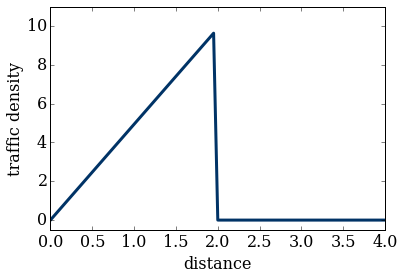

In [6]:
pyplot.plot(x,rho, color='#003366', ls = '-', lw = 3)
pyplot.ylabel('traffic density')
pyplot.xlabel('distance')
pyplot.ylim(-0.5,11.);


In [7]:
def computeF(u_max,rho_max,rho):
    return u_max*rho*(1-rho/rho_max)

In [8]:
def ftbs(rho,nt,dt,dx,rho_max,u_max):
    #initialize results array with dim nt by nx
    rho_n = numpy.zeros((nt,len(rho)))
    #copy initial u array into each row of our new array
    rho_n[0,:]=rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max,rho_max,rho)
        rho_n[t,1:]=rho[1:]-dt/dx*(F[1:]-F[:-1])
        rho_n[t,0]=rho[0]
        rho = rho_n[t].copy()
    return rho_n

In [9]:
sigma = 1.
dt = sigma*dx
rho_n = ftbs(rho,nt,dt,dx,rho_max,u_max)

In [10]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation


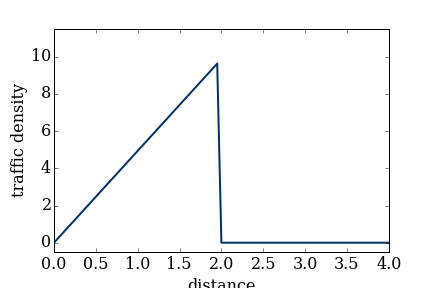
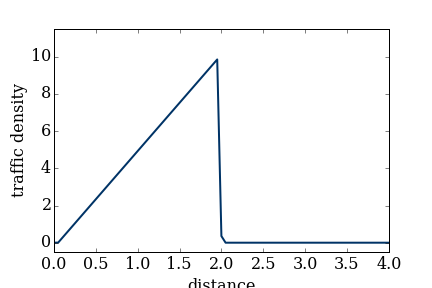
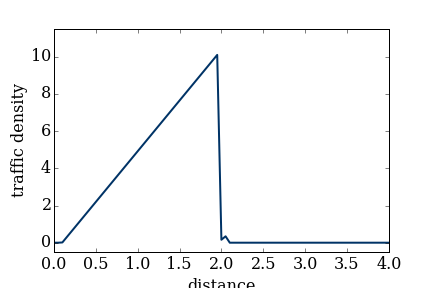
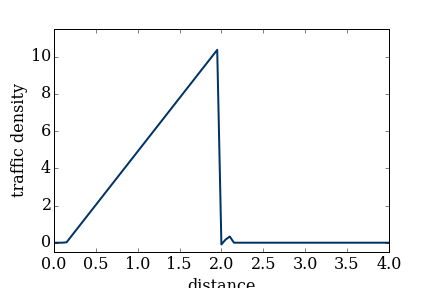
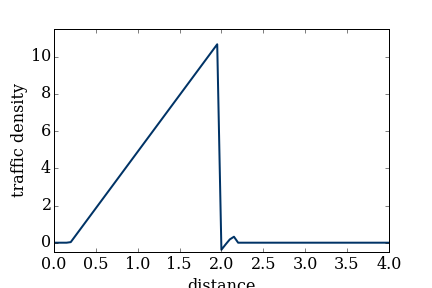
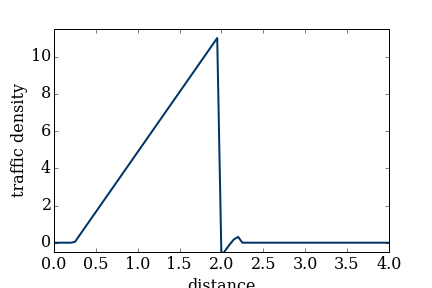
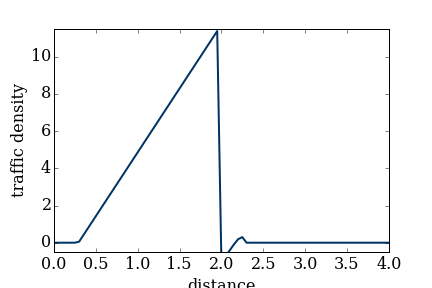
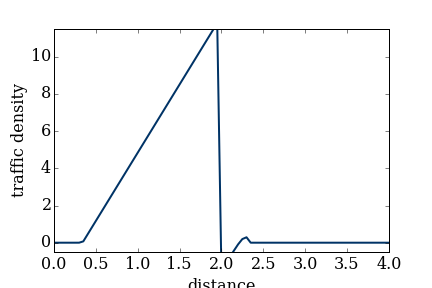
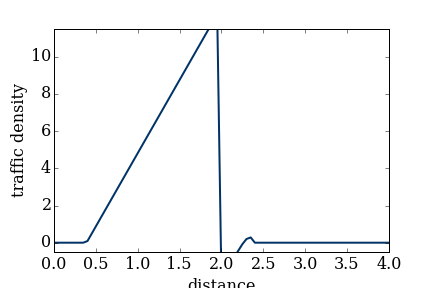
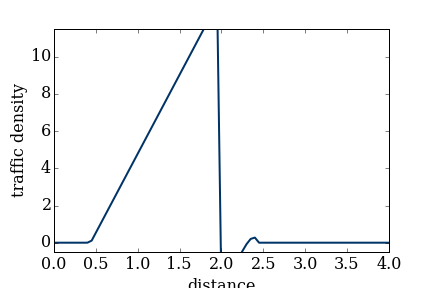
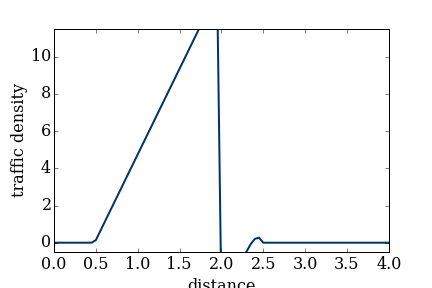
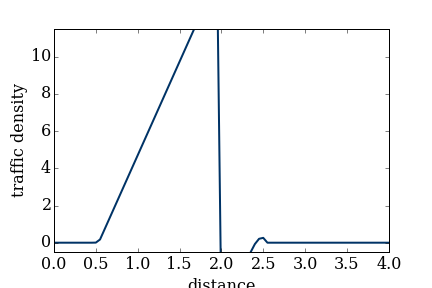
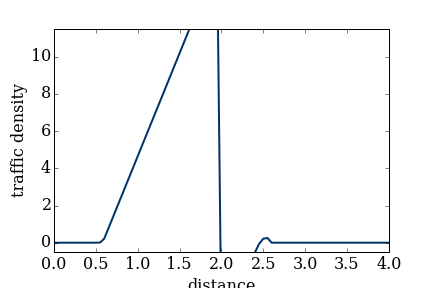
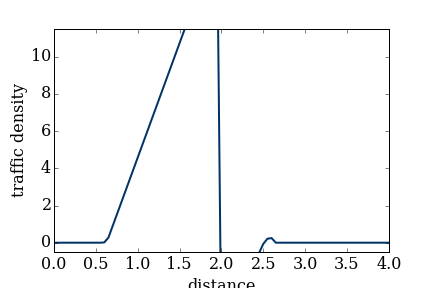
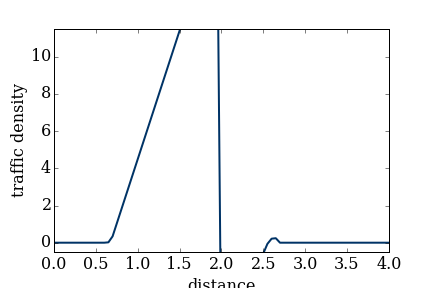
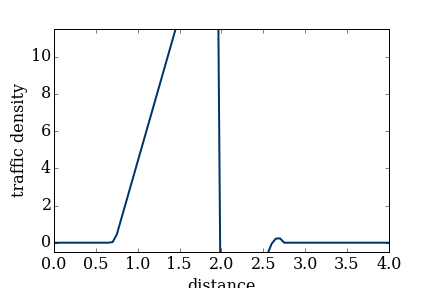
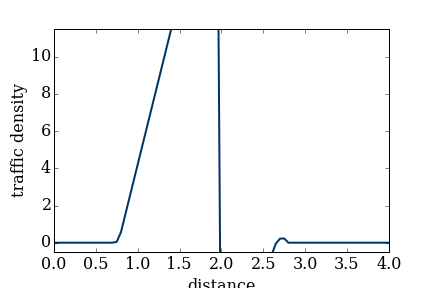
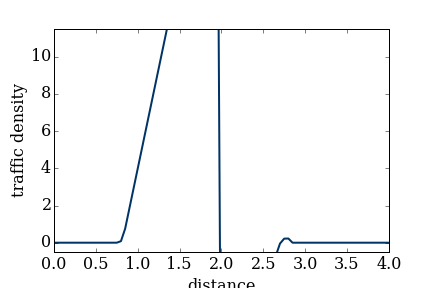
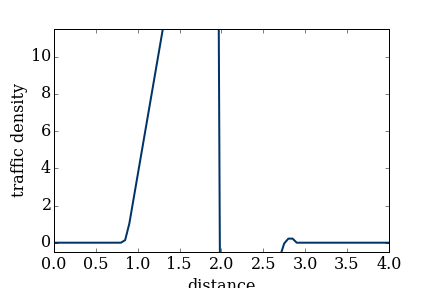
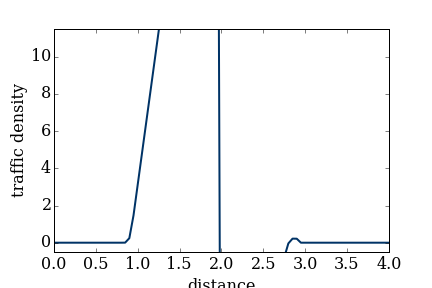
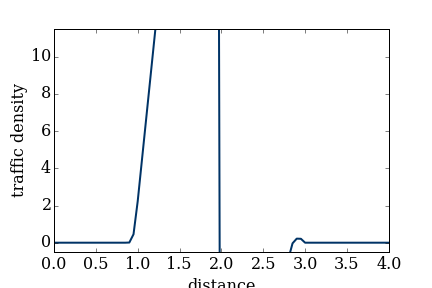
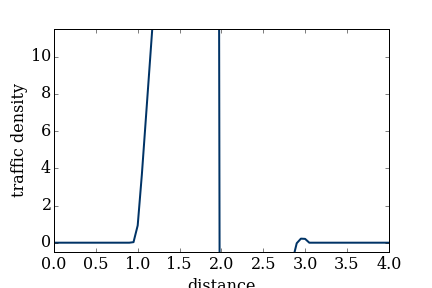
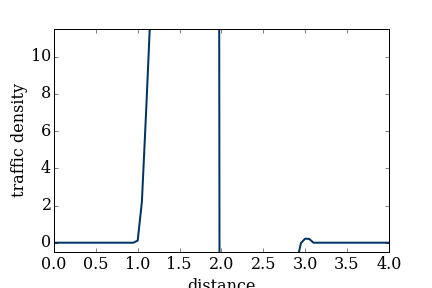
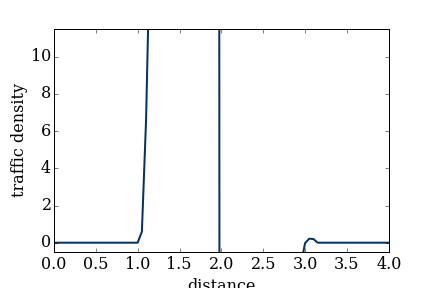
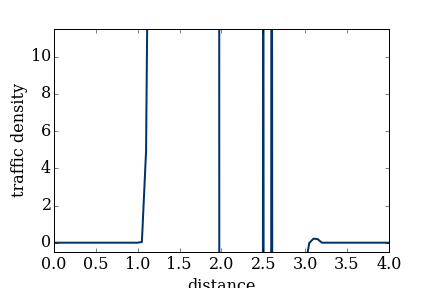
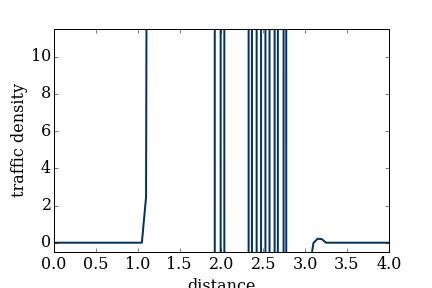
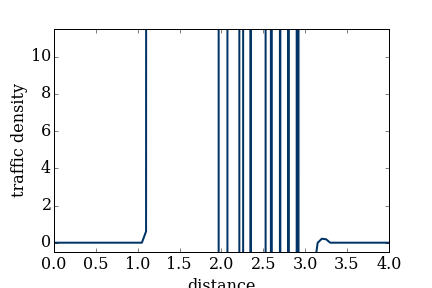
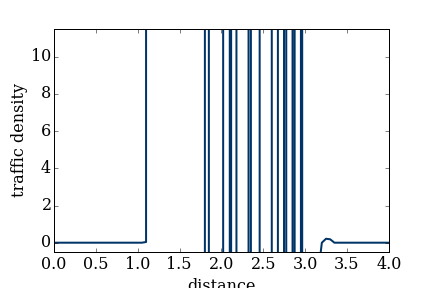
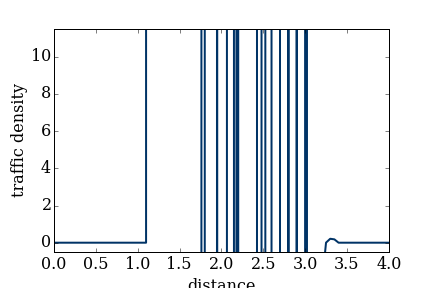
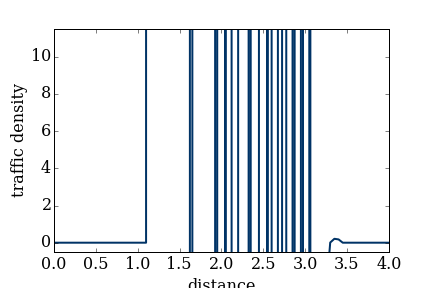

In [11]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-.5,11.5),xlabel=('distance'),ylabel=('traffic density'));
line,=ax.plot([],[],color='#003366',lw=2);

def animate(data):
    x=numpy.linspace(0,4,nx)
    y= data
    line.set_data(x,y)
anim = animation.FuncAnimation(fig,animate,frames=rho_n,interval=50)
display_animation(anim,default_mode='once')


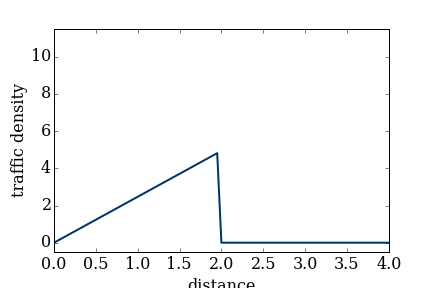
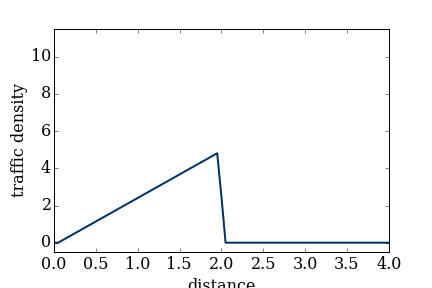
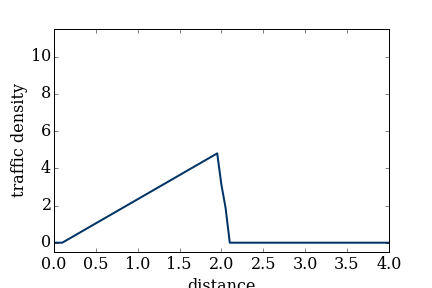
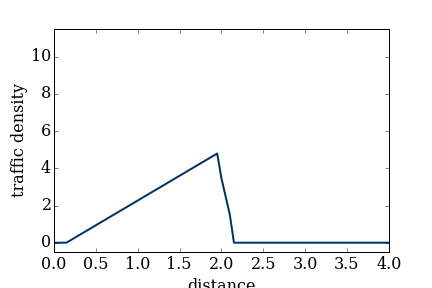
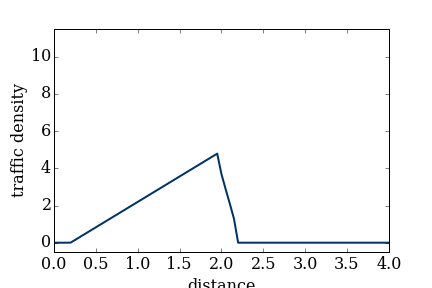
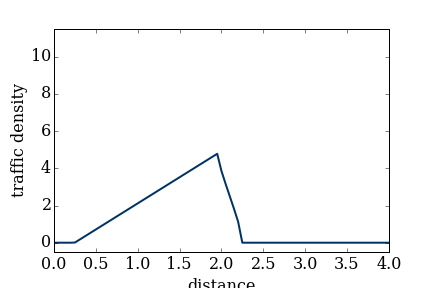
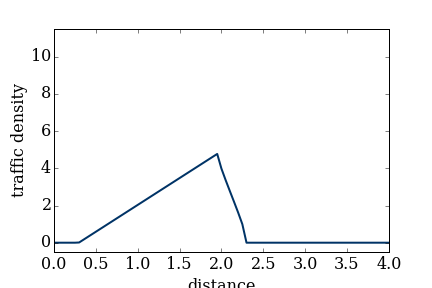
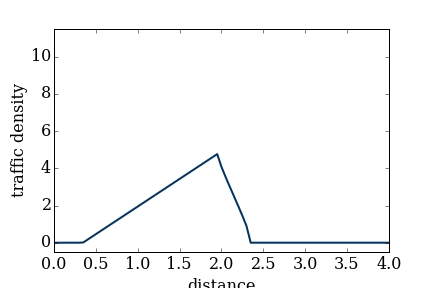
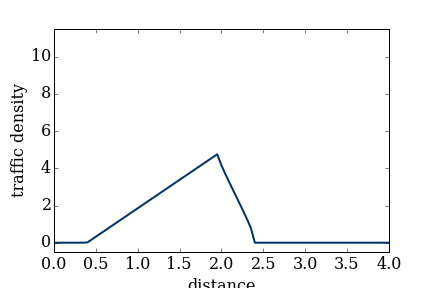
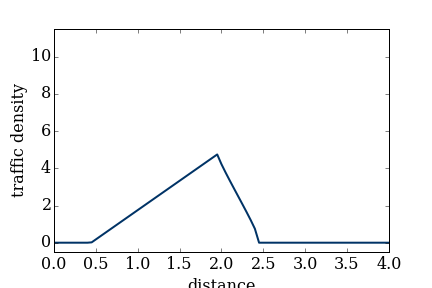
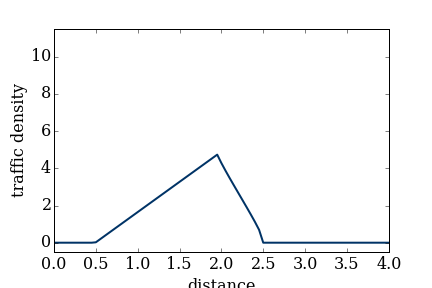
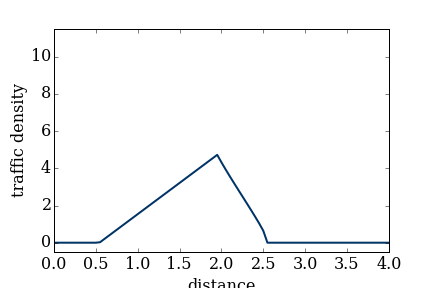
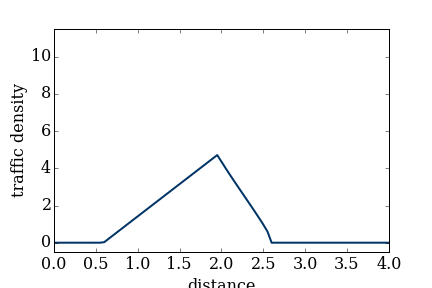
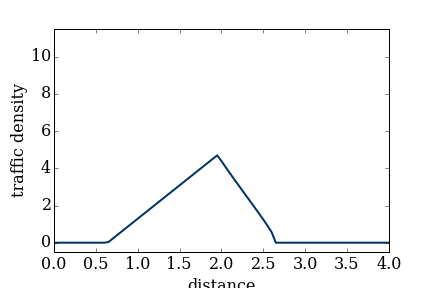
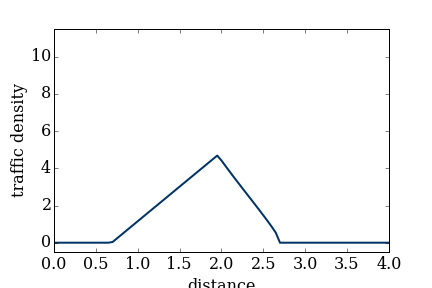
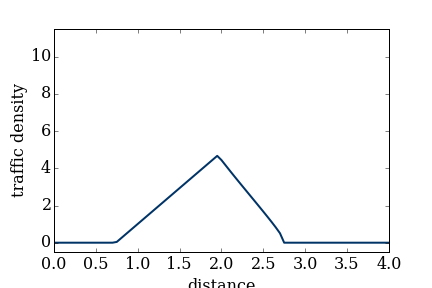
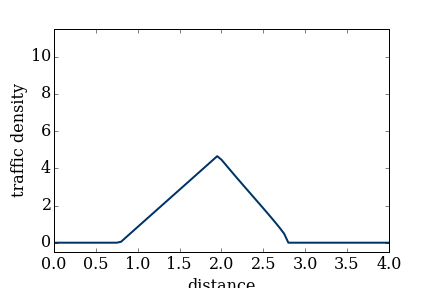
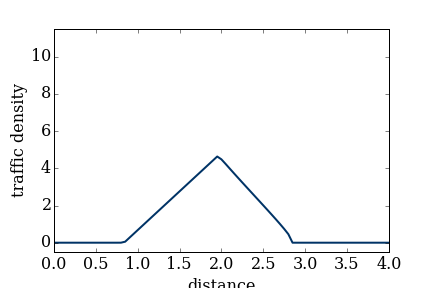
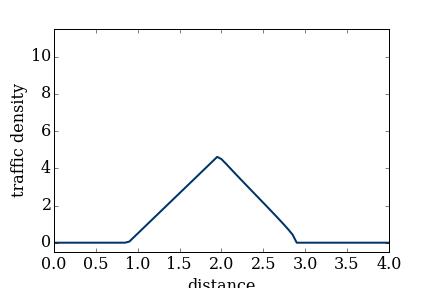
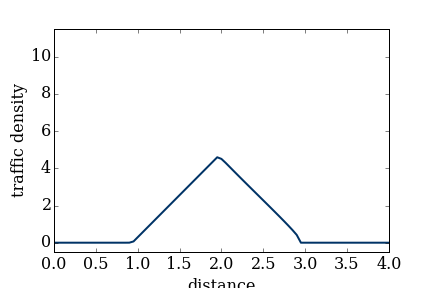
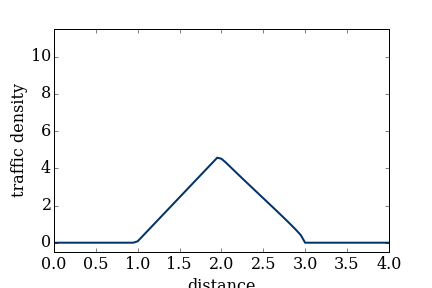
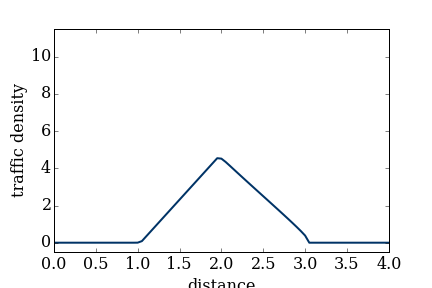
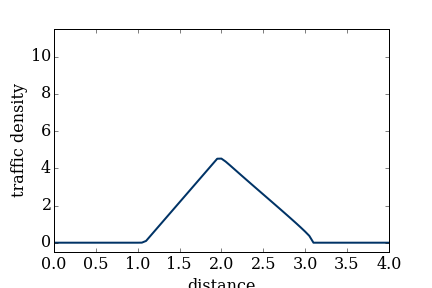
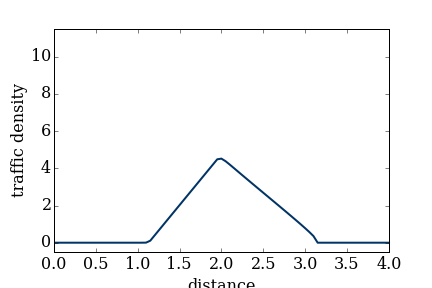
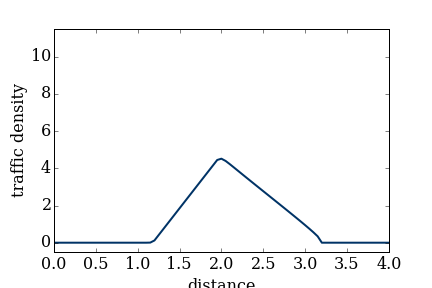
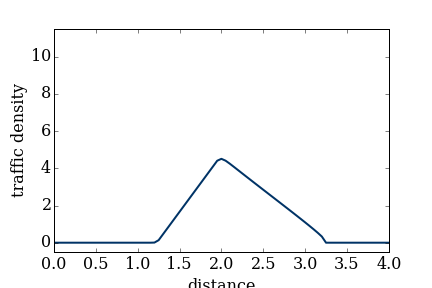
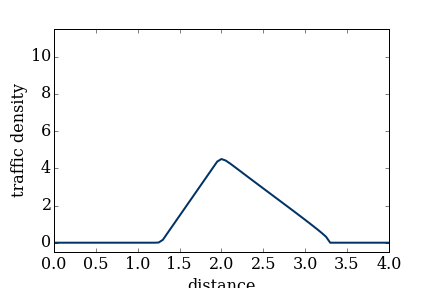
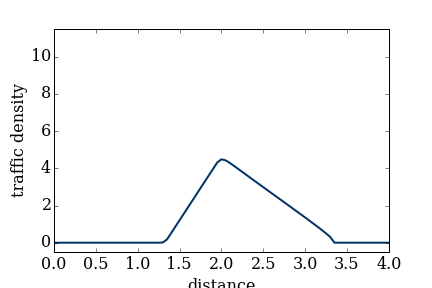
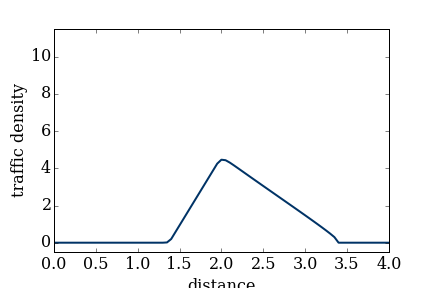
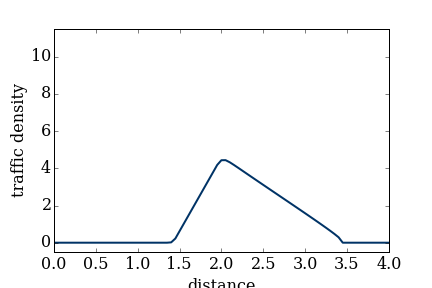
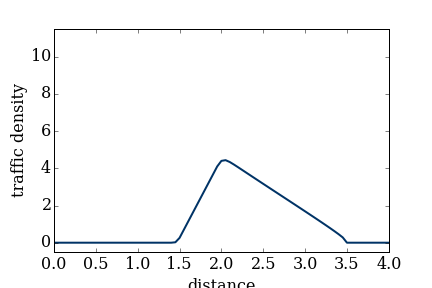
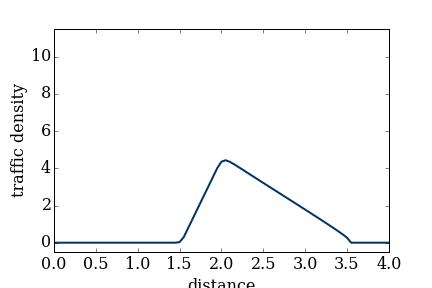
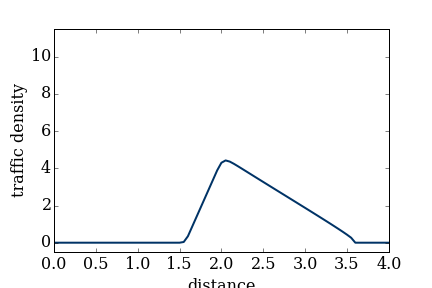
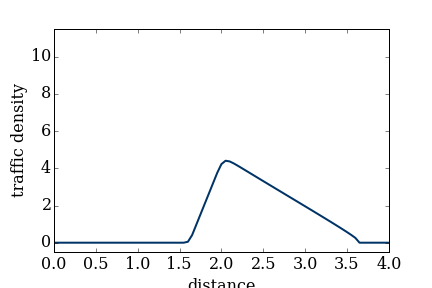
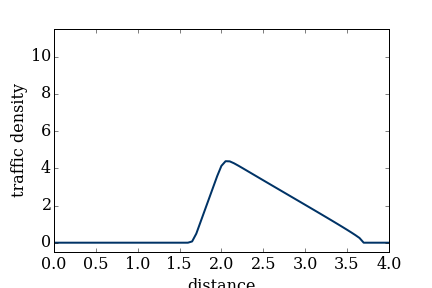
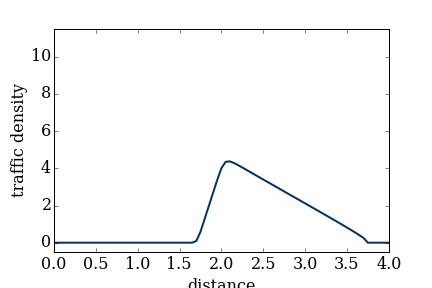
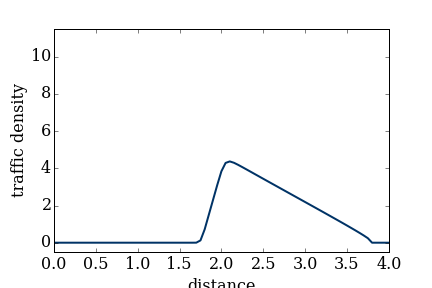
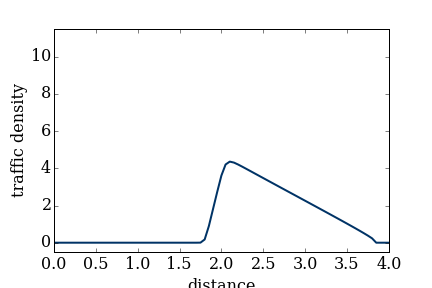
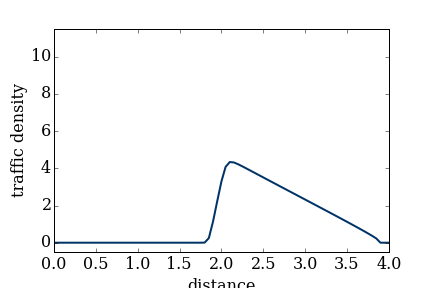
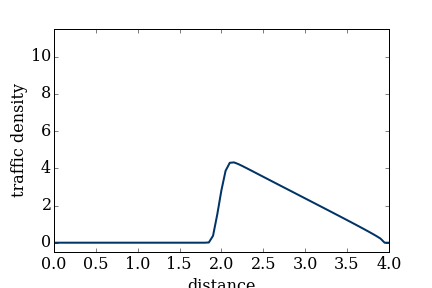

In [16]:
rho_light=5.
nt = 40
rho = rho_green_light(nx,rho_light)
rho_n = ftbs(rho,nt,dt,dx,rho_max,u_max)
anim=animation.FuncAnimation(fig,animate,frames=rho_n,interval=50)
display_animation(anim,default_mode='once')

In [17]:
#crate ftfs scheme which is stable for negative wave speeds
#unstable for positive wave speeds, make sure wave speed is (-) everywhere
#def ftfs():


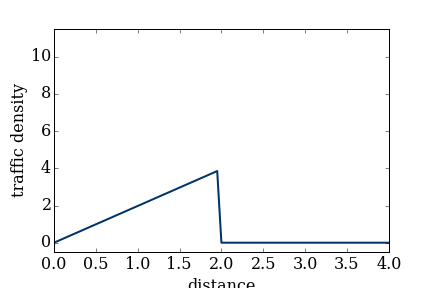
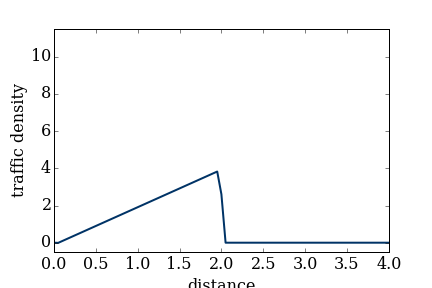
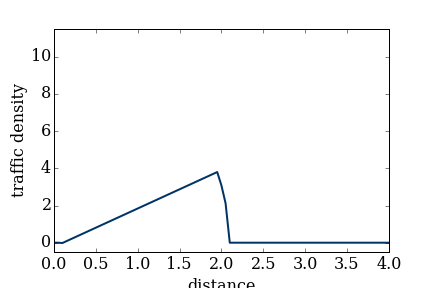
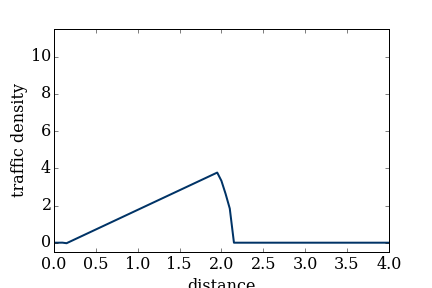
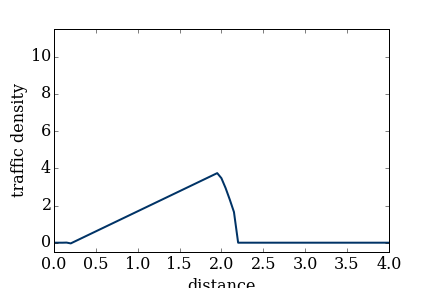
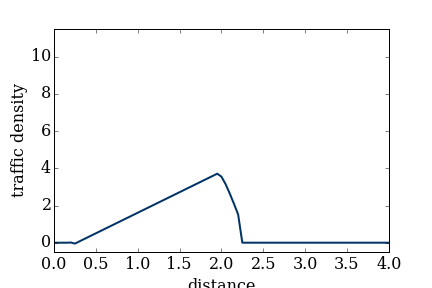
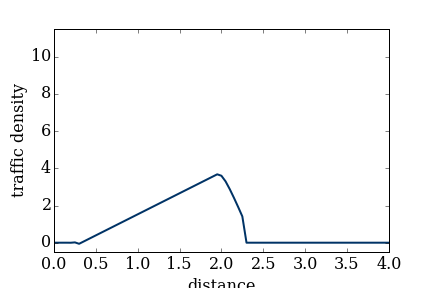
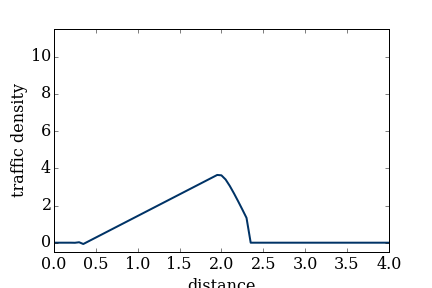
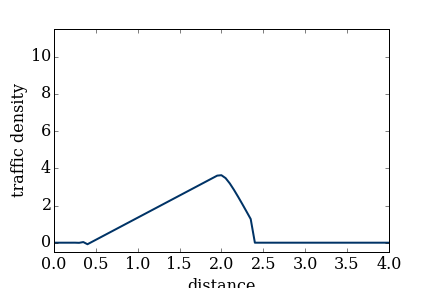
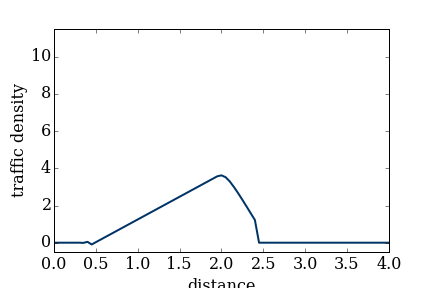
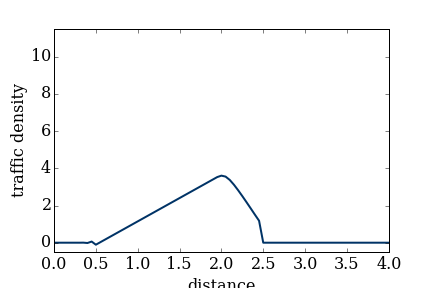
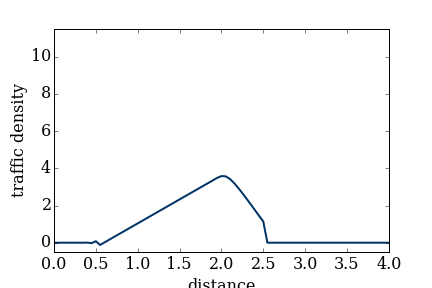
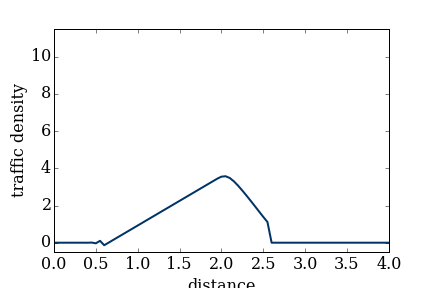
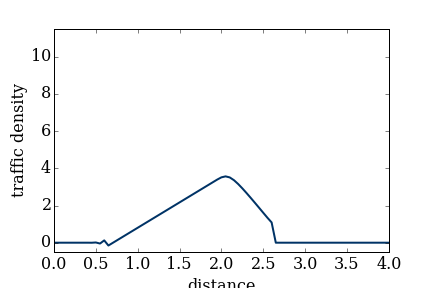
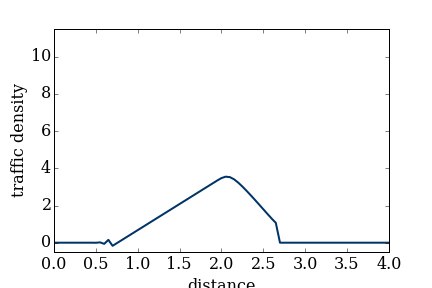
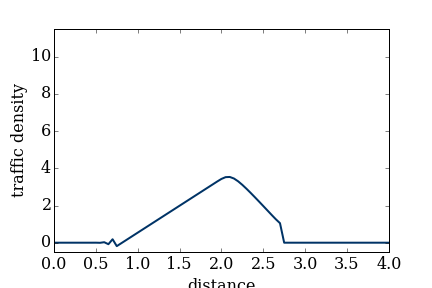
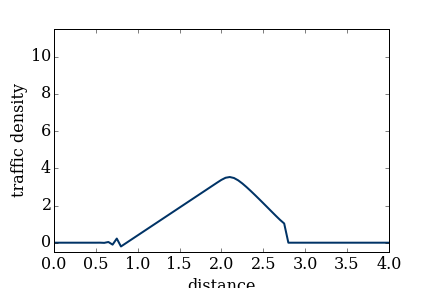
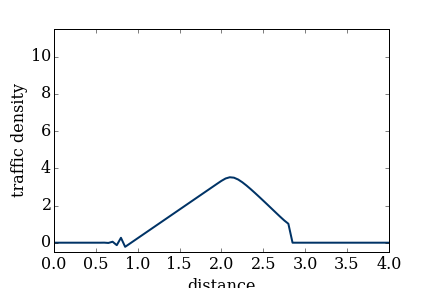
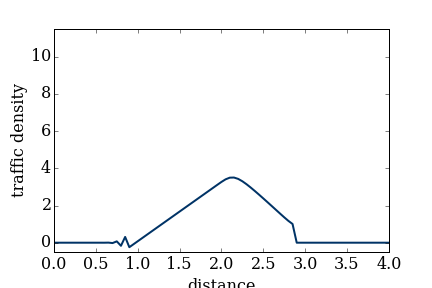
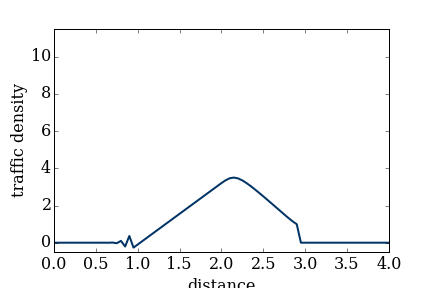
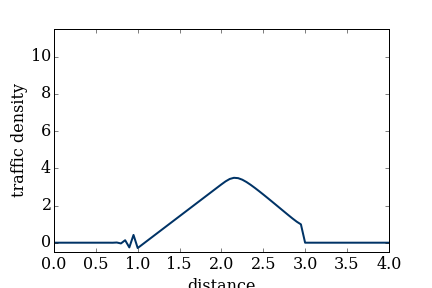
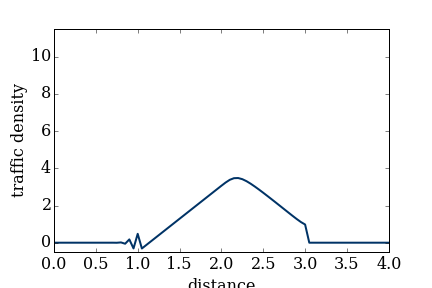
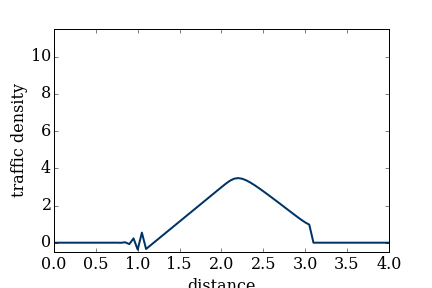
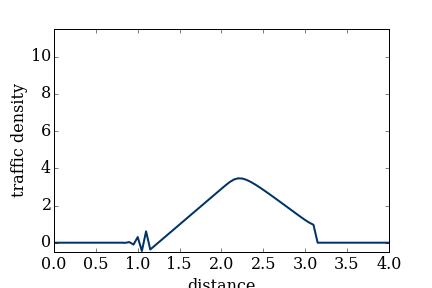
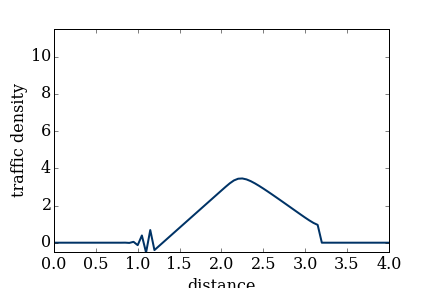
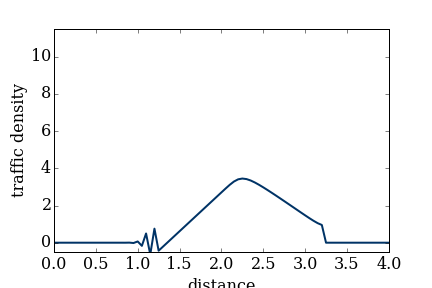
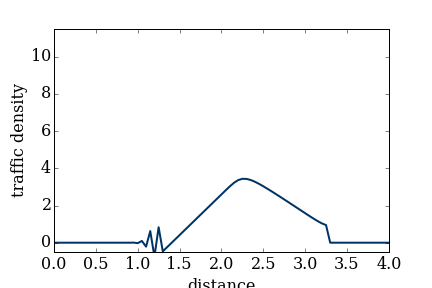
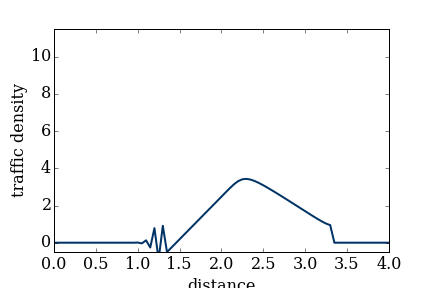
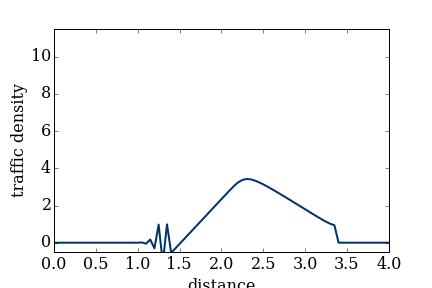
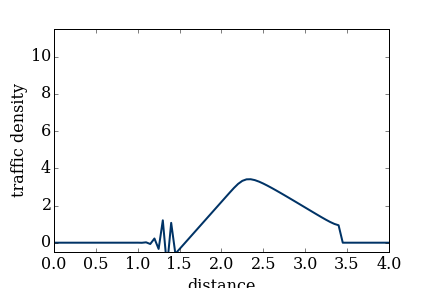
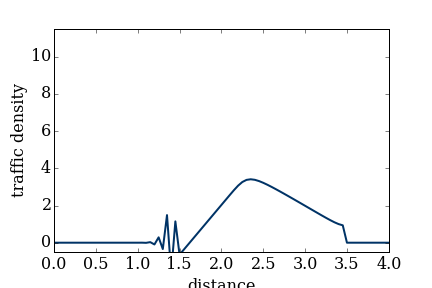
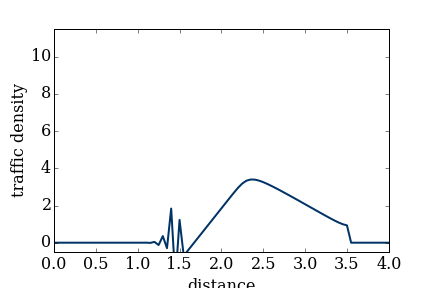
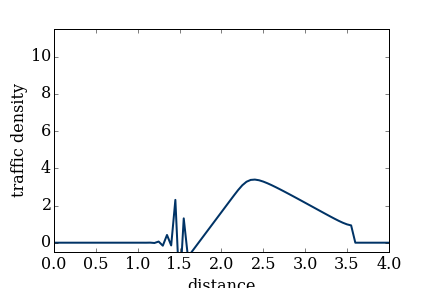
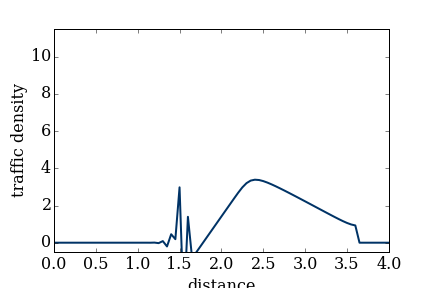
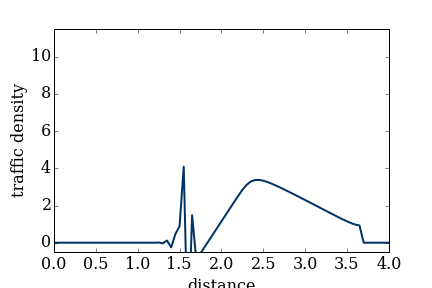
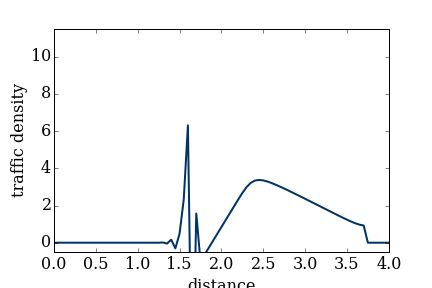
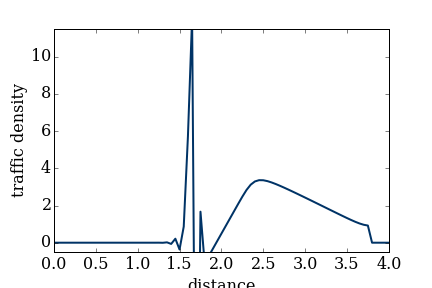
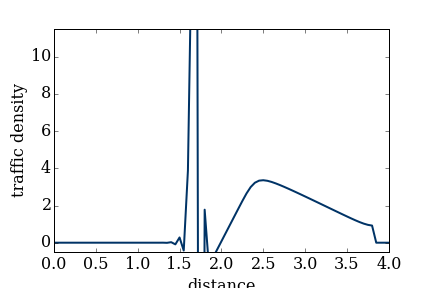
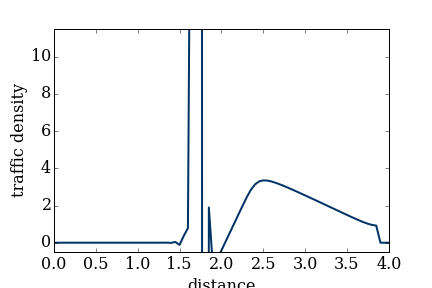
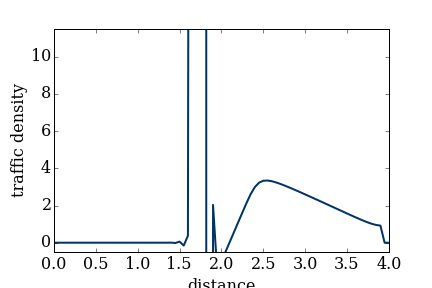

In [19]:
rho_light =4.
u_max = 1.1
nt = 40
rho = rho_green_light(nx,rho_light)
rho_n=ftbs(rho,nt,dt,dx,rho_max,u_max)
anim=animation.FuncAnimation(fig,animate,frames=rho_n,interval=50)
display_animation(anim,default_mode='once')